In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are all three type of dtypes 

In [6]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
dtype: float64

There is no skewness in dataset so we will not treat it

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There is nan values in one column

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


There is no huge differnce in 75% and max means there is no outlier looking at mean and median data is 
normally distributed

Dropping some useless column which does not play role in insurance fraud

In [9]:
df.drop('_c39',axis=1,inplace=True)

In [10]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [11]:
df.drop('policy_state',axis=1,inplace=True)

In [12]:
df.drop('policy_csl',axis=1,inplace=True)

In [13]:
df.drop('policy_deductable',axis=1,inplace=True)

In [14]:
df

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,1406.91,0,466132,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,1583.91,6000000,610706,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


After droping that column we don't have null values in dataset 

In [15]:
df.describe()

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [16]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

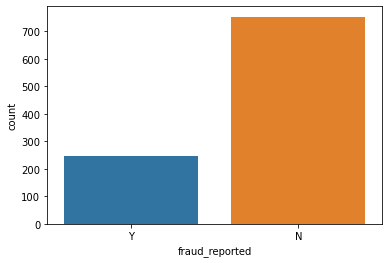

In [17]:
sns.countplot(df['fraud_reported'])

There were 247 frauds and 753 non-frauds.25% of the data were frauds while 75% were non-fraudulent claims.

<AxesSubplot:xlabel='count', ylabel='insured_education_level'>

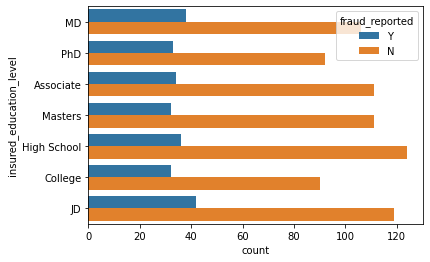

In [18]:
sns.countplot(y='insured_education_level',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

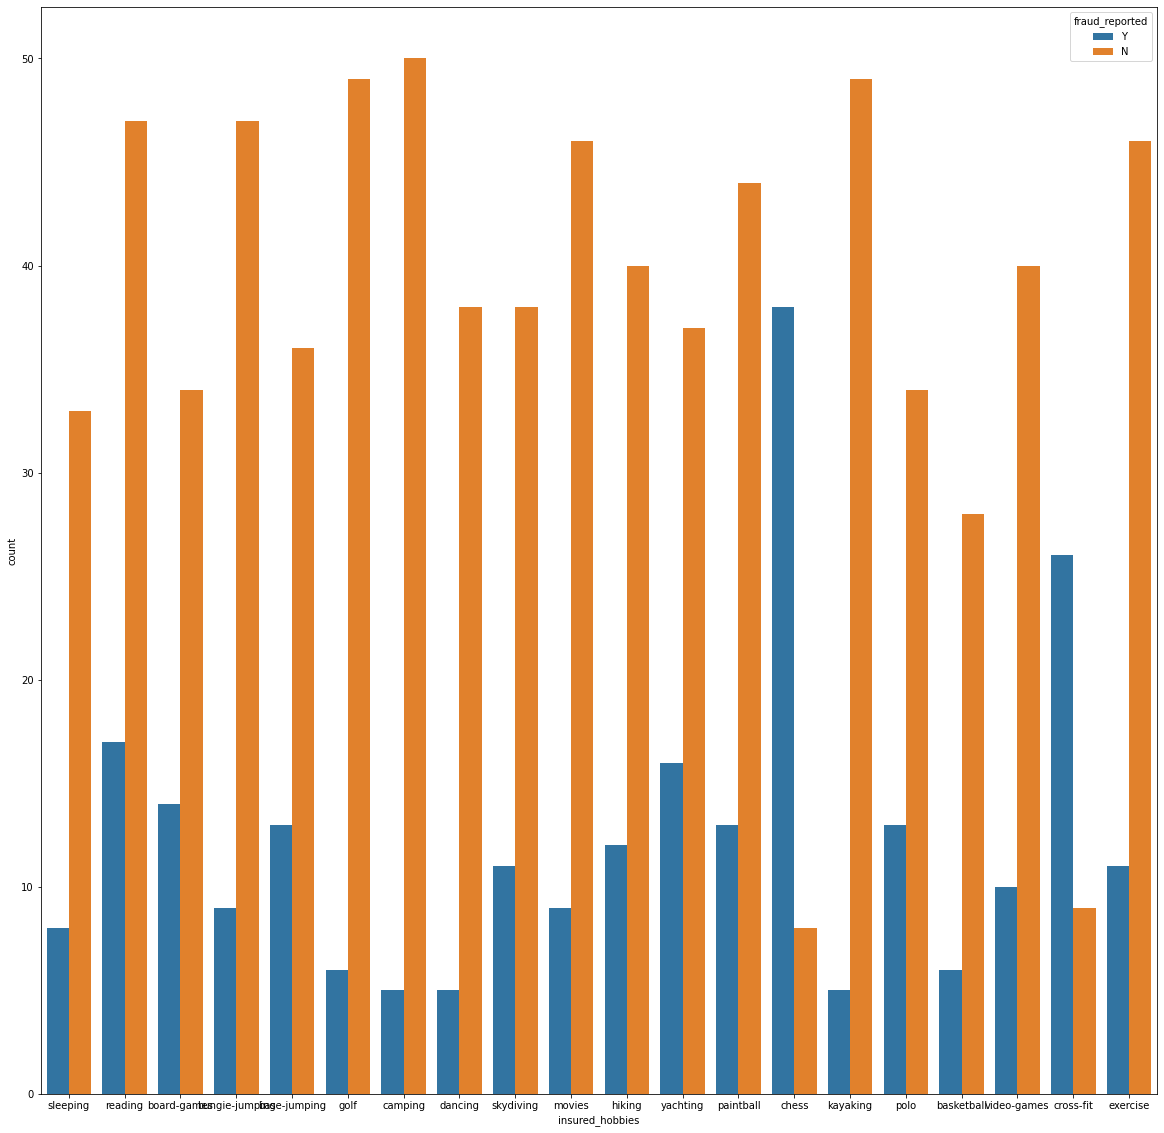

In [19]:
plt.figure(figsize=(20,20))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

Major incident severity seems to have highest fraud cases that exceed non fraud cases.

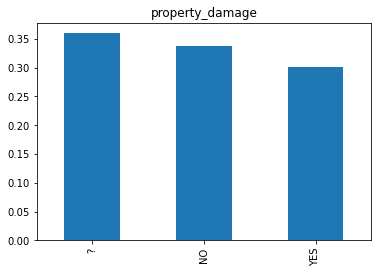

In [20]:
df['property_damage'].value_counts(normalize=True).plot.bar(title='property_damage')
plt.show()

<AxesSubplot:xlabel='auto_make', ylabel='count'>

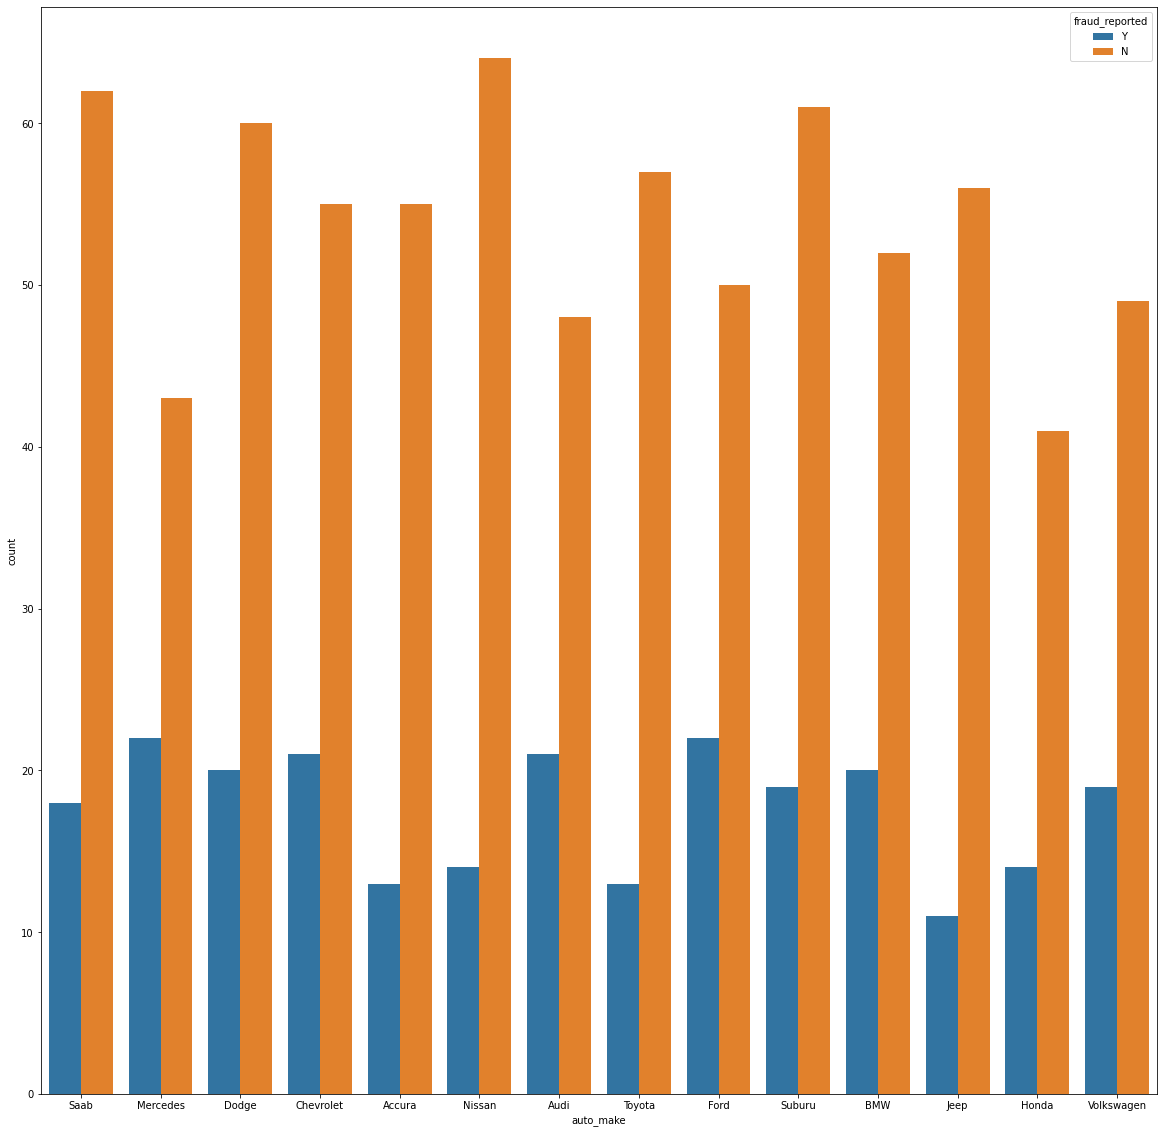

In [21]:
plt.figure(figsize=(20,20))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

The most fraud case was reported by Ford and Mercedes owner

Lets convert our categorical data in numerical type 

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
ode=OrdinalEncoder()

In [24]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=ode.fit_transform(df[i].values.reshape(-1,1))

In [25]:
df

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,1406.91,0,466132,1.0,4.0,2.0,17.0,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,1197.22,5000000,468176,1.0,4.0,6.0,15.0,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,1413.14,5000000,430632,0.0,6.0,11.0,2.0,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,1415.74,6000000,608117,0.0,6.0,1.0,2.0,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,1583.91,6000000,610706,1.0,0.0,11.0,2.0,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1310.80,0,431289,0.0,5.0,2.0,13.0,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,1436.79,0,608177,0.0,6.0,9.0,17.0,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,1383.49,3000000,442797,0.0,5.0,1.0,3.0,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,1356.92,5000000,441714,1.0,0.0,5.0,0.0,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


Now lets convert our target column in integer type for better accuracy

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [28]:
df

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,1406.91,0,466132,1.0,4.0,2.0,17.0,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1
1,228,42,342868,1197.22,5000000,468176,1.0,4.0,6.0,15.0,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1
2,134,29,687698,1413.14,5000000,430632,0.0,6.0,11.0,2.0,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0
3,256,41,227811,1415.74,6000000,608117,0.0,6.0,1.0,2.0,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1
4,228,44,367455,1583.91,6000000,610706,1.0,0.0,11.0,2.0,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1310.80,0,431289,0.0,5.0,2.0,13.0,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0
996,285,41,186934,1436.79,0,608177,0.0,6.0,9.0,17.0,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0
997,130,34,918516,1383.49,3000000,442797,0.0,5.0,1.0,3.0,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0
998,458,62,533940,1356.92,5000000,441714,1.0,0.0,5.0,0.0,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0


In [29]:
df.corr()

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.022566,0.008968,0.007083,0.004564,-0.037264,-0.014422,0.039896,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_annual_premium,0.005018,0.014404,0.022566,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,...,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.037264,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,0.021807,...,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.014422,0.035922,0.023422,-0.069077,-0.006160,-0.020298,1.000000,-0.011077,...,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564
insured_hobbies,-0.093661,-0.081315,0.039896,-0.018019,-0.037000,0.002106,-0.020317,0.021807,-0.011077,1.000000,...,-0.033971,-0.045452,-0.004488,0.028393,0.012535,-0.016814,0.001525,0.030948,-0.014495,-0.046838


<AxesSubplot:>

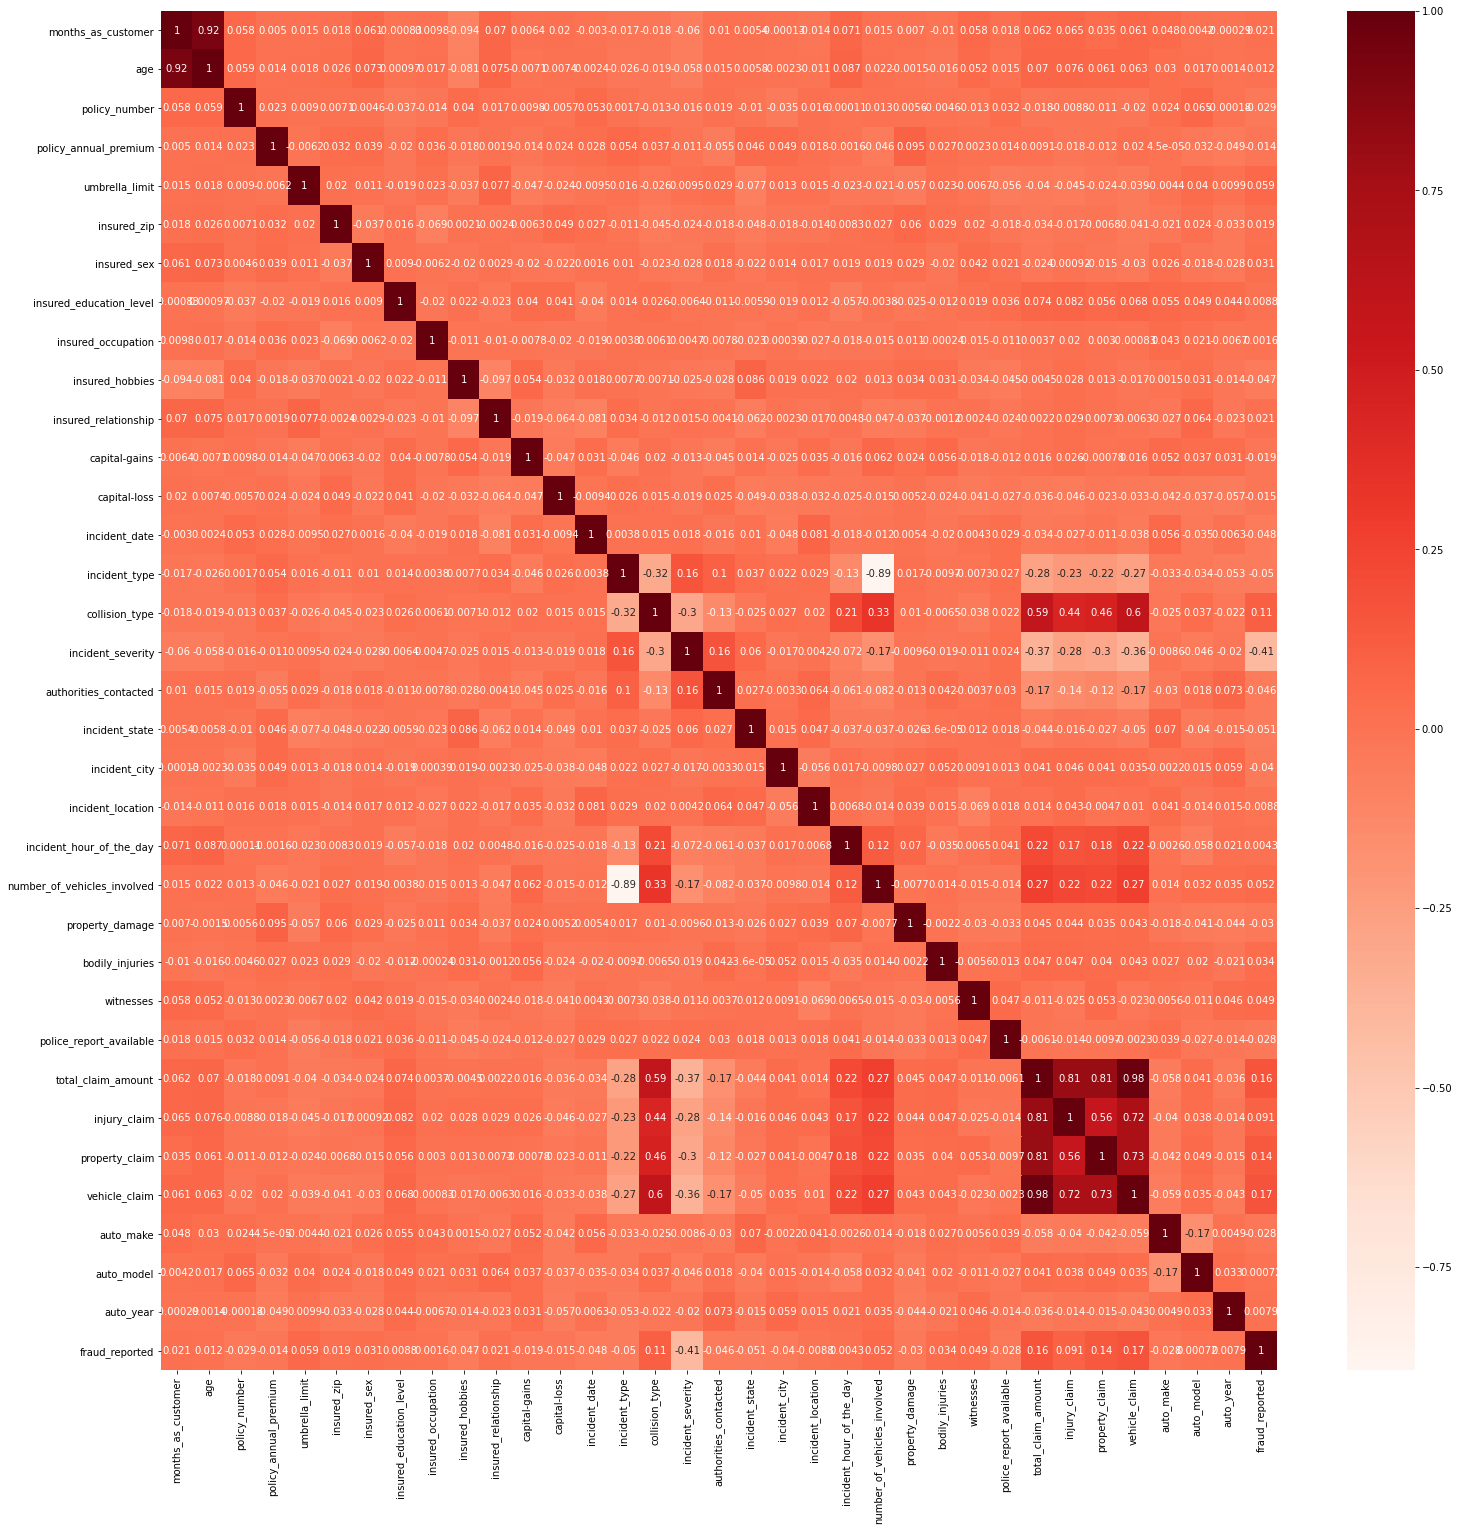

In [30]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

As we can see Injury_claim total_claim_property and property_claim are highly correlated

months_as_customer               AxesSubplot(0.125,0.816017;0.0731132x0.0639831)
age                            AxesSubplot(0.212736,0.816017;0.0731132x0.0639...
policy_number                  AxesSubplot(0.300472,0.816017;0.0731132x0.0639...
policy_annual_premium          AxesSubplot(0.388208,0.816017;0.0731132x0.0639...
umbrella_limit                 AxesSubplot(0.475943,0.816017;0.0731132x0.0639...
insured_zip                    AxesSubplot(0.563679,0.816017;0.0731132x0.0639...
insured_sex                    AxesSubplot(0.651415,0.816017;0.0731132x0.0639...
insured_education_level        AxesSubplot(0.739151,0.816017;0.0731132x0.0639...
insured_occupation             AxesSubplot(0.826887,0.816017;0.0731132x0.0639...
insured_hobbies                  AxesSubplot(0.125,0.739237;0.0731132x0.0639831)
insured_relationship           AxesSubplot(0.212736,0.739237;0.0731132x0.0639...
capital-gains                  AxesSubplot(0.300472,0.739237;0.0731132x0.0639...
capital-loss                

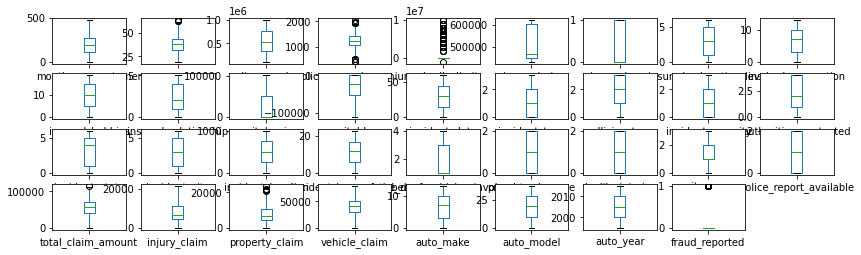

In [31]:
df.plot(kind='box',subplots=True,layout=(10,9),figsize=(14,10))

As we can see from above column there is no outlier in column so we will not treat it

Lets train and test our dataset by using classifier models

In [32]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.83
[[146   6]
 [ 28  20]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       152
           1       0.77      0.42      0.54        48

    accuracy                           0.83       200
   macro avg       0.80      0.69      0.72       200
weighted avg       0.82      0.83      0.81       200



In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.82
[[130  22]
 [ 14  34]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       152
           1       0.61      0.71      0.65        48

    accuracy                           0.82       200
   macro avg       0.75      0.78      0.77       200
weighted avg       0.83      0.82      0.82       200



In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.85
[[143   9]
 [ 21  27]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       152
           1       0.75      0.56      0.64        48

    accuracy                           0.85       200
   macro avg       0.81      0.75      0.77       200
weighted avg       0.84      0.85      0.84       200



Lers cross validate the model

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.767


In [43]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.768


In [44]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.7959999999999999


After cross validation there is less diference in dtc 

# Hyper parameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters={'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [47]:
GCV_dtc=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV_dtc.fit(x_train,y_train)
GCV_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [48]:
dtc_mod=DecisionTreeClassifier(criterion='entropy',max_depth=7,)
dtc_mod.fit(x_train,y_train)
pred=dtc_mod.predict(x_test)
(accuracy_score(y_test,pred))

0.85

After Hyper parameter tuning we get 85%

# AUC ROC CURVE

In [49]:
from sklearn.metrics import plot_roc_curve

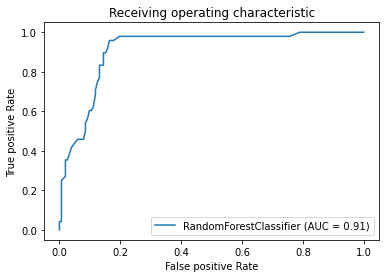

In [50]:
plot_roc_curve(RFC,x_test,y_test)
plt.title('Receiving operating characteristic')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

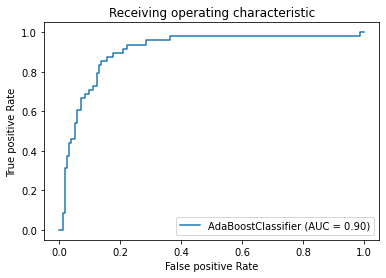

In [51]:
plot_roc_curve(ad,x_test,y_test)
plt.title('Receiving operating characteristic')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

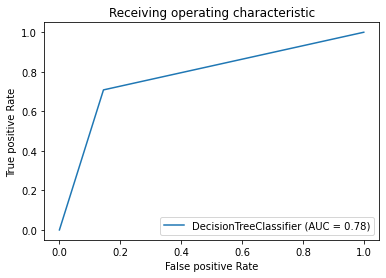

In [52]:
plot_roc_curve(dtc,x_test,y_test)
plt.title('Receiving operating characteristic')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

# MODEL SAVING

In [53]:
import pickle

In [54]:
filename='Automobile_insurance_fraud.csv.pkl'
pickle.dump(dtc,open(filename,'wb'))

In [55]:
import joblib

In [56]:
joblib.dump(dtc,'Automobile_insurance_fraud.csv2.pkl')

['Automobile_insurance_fraud.csv2.pkl']

# Observations

* There is class imbalance which is not that severe

* There was 1 useless column which has nan value after droping that there were no null values

* There were no skewness in the dataset

* Use Label encoder and Ordinal encoder to convert data from categorical into numerical

* There were no outlier in dataset

* Use three model Decision treee,Random forest and Adaboost in which Decision tree was best Cross validation